## Implementation of Random Forest Classifier Algorihm 

### Import the Libraries

In [70]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import metrics

In [56]:
df=pd.read_csv('emails.csv')

In [57]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [58]:
df.shape

(5172, 3002)

## Exploratory Data Analysis

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [60]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [61]:
df=df.rename(columns={'Email No.':'Email'})

In [62]:
num_cols=df.select_dtypes('int64')

### Checking for most Skewed Features

In [63]:
most_skewed=df.skew().sort_values(ascending=False).head(10)

In [64]:
most_skewed

itoy         71.916618
hottlist     71.916618
hotlist      71.916618
moopid       71.916618
abdv         71.916618
knle         71.916618
ftar         71.866386
milwaukee    71.486462
airmail      71.461762
enw          71.060419
dtype: float64

In [65]:
cols=df.iloc[:,1:]
for col in cols:
    df[col]=np.sqrt(df[col])

In [67]:
X=df.drop(['Email','Prediction'],axis=1)
y=df.Prediction

### Train Test Split 

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.23,random_state=42)

## Random Forest Classifier
### A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

### Random Forest Classifier Algorithm consists of various parameters.We have not implemented hyperparamater tuning as result of good accuracy being achieved on our test set.
### **Some of the important parameters are:**
* **n_estimators**:Number of trees in the forest.
* **criterion**:The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
* **max_depth**:The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* **min_samples_split**:The minimum number of samples required to split an internal node.
* **max_features**:The number of features to consider when looking for the best split:

* **bootstrap**:Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

In [71]:
rf=ensemble.RandomForestClassifier()
rf.fit(X_train,y_train)
predictions=rf.predict(X_test)
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       842
         1.0       0.95      0.97      0.96       348

    accuracy                           0.98      1190
   macro avg       0.97      0.98      0.97      1190
weighted avg       0.98      0.98      0.98      1190



### Confusion Matrix
### We observe that there is a high proportion of True Positives and True negatives as compared to False Postives and False Negatives.
### This helps to achieve a good accuracy .

<AxesSubplot:>

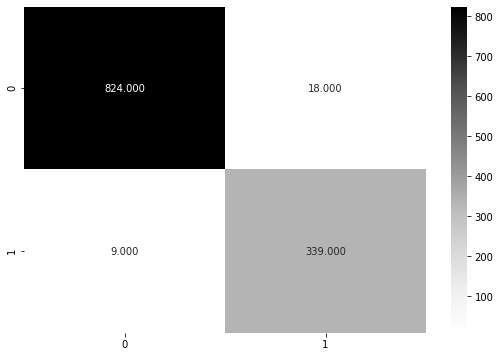

In [76]:
matrix=metrics.confusion_matrix(y_test,predictions)

plt.figure(figsize=(9,6))
sns.heatmap(matrix,annot=True,fmt='0.3f',cmap='Greys')

## Making top10 Predictions and comparing with actual target label

In [97]:
preds=predictions[:10]
y_true=y_test[:10]
dt=pd.DataFrame({'Preds':preds,'y_true':y_true})


In [98]:
dt

,Preds,y_true
1566,0.0,0.0
1988,0.0,0.0
1235,1.0,1.0
3276,0.0,0.0
3438,0.0,0.0
1471,0.0,0.0
1129,1.0,1.0
3750,0.0,0.0
3049,0.0,0.0
530,0.0,0.0
